<a href="https://colab.research.google.com/github/sayan0506/CNN-based-Classification-problem-using-Keras/blob/master/Deep_Learning_For_Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning For Traffic Sign Classification

# PROJECT OVERVIEW 


* Traffic sign classification is an important task for self-driving cars

* In this project, a Deep CNN model will be trained to classify traffic signs

* The dataset is consisted of  43 different classes of images
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


# INPUTS AND OUTPUTS

* Input images are colored of shape (32,32), which consist 3 RGB channels for red, green and blue colors.

**Solution workflow**

Input image --> Classifier --> {Target classes(20 km/h, 50 km/h, 100 km/h, Stop, Yield]


**Drive Mount**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




# IMPORT LIBRARIES/DATASETS

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dividing dataset into training, validation and testing

* Dataset is divided into 80% training data, 20% for testing.

* Sometimes division is like: 60% training, 20% validation and 20% for testing.

* Training set is used to train the model, where the validation set used to cross-validate the model, i.e  to check whether the model is overfitting the train data or not. Finally, the test data is used to test the trained model.



In [3]:
with open("/content/drive/My Drive/Notebook/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/Notebook/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Notebook/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
# loading train data
(x_train, y_train) = train['features'], train['labels']
print('Train datashape: {0}, {1}'.format(x_train.shape,y_train.shape))

Train datashape: (34799, 32, 32, 3), (34799,)


In [5]:
# loading validation data
(x_valid, y_valid) = valid['features'], valid['labels']
print('Validation datashape: {0}, {1}'.format(x_valid.shape,y_valid.shape))

Validation datashape: (4410, 32, 32, 3), (4410,)


In [6]:
# loading test data
(x_test, y_test) = test['features'], test['labels']
(X_test, Y_test) = test['features'], test['labels']

print('Test datashape: {0}, {1}'.format(x_test.shape,y_test.shape))

Test datashape: (12630, 32, 32, 3), (12630,)


# PERFORM IMAGES VISUALIZATION

Samples of train images:


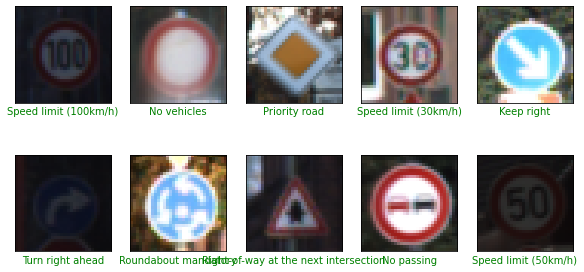

In [7]:
# list of classifiers
classifiers = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)',
               'Speed limit (100km/h)','Speed limit (120km/h)','No passing','No passing for vehicles over 3.5 metric tons','Right-of-way at the next intersection','Priority road',
               'Yield','Stop','No vehicles','Vehicles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
               'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right','Road work','Traffic signals',
               'Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow','Wild animals crossing','End of all speed and passing limits',
               'Turn right ahead','Turn left ahead','Ahead only','Go straight or right','Go straight or left','Keep right',
               'Keep left','Roundabout mandatory','End of no passing','End of no passing by vehicles over 3.5 metric tons']
len(classifiers)

def show_random_examples(x,y):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green'
        plt.xlabel(classifiers[y[i]], color=col)
    plt.show()

print('Samples of train images:')
show_random_examples(x_train, y_train)

Samples of validation images:


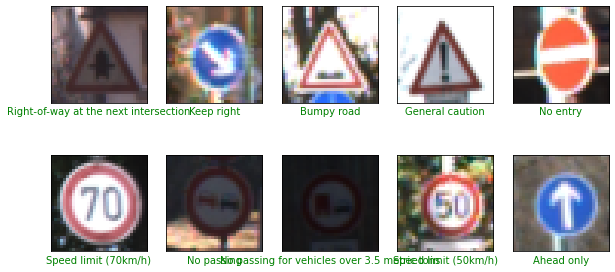

In [8]:
print('Samples of validation images:')
show_random_examples(x_valid, y_valid)

Samples of test images:


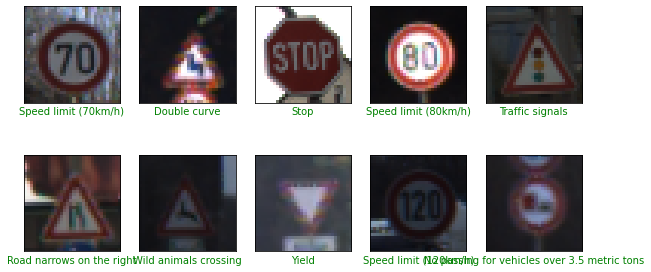

In [9]:
print('Samples of test images:')
show_random_examples(x_test, y_test)

# CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [10]:
from sklearn.utils import shuffle

Grayscale conversion and normalization of images.

In [11]:
x_train = np.sum(x_train/3, axis = 3, keepdims=True)
x_valid = np.sum(x_valid/3, axis = 3, keepdims=True)
x_test = np.sum(x_test/3, axis = 3, keepdims=True)

x_train = (x_train - 128)/128
x_valid = (x_valid - 128)/128
x_test = (x_test - 128)/128
print('Shapes of train, valid, test after grayscale conversion and normalization are:\n{0}, {1}, {2}'.format(x_train.shape,x_valid.shape, x_test.shape))

Shapes of train, valid, test after grayscale conversion and normalization are:
(34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1)


Images after grey scaling and normalization


Text(0.5, 0, 'Vehicles over 3.5 metric tons prohibited')

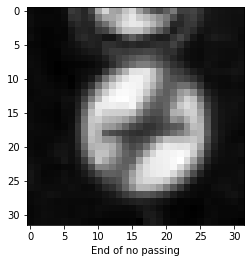

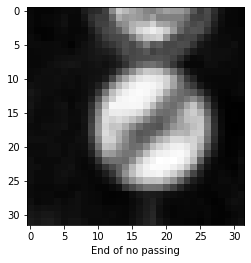

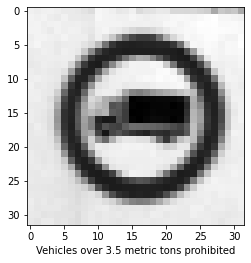

In [12]:
print('Images after grey scaling and normalization')
plt.figure(0)
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.xlabel(classifiers[y_train[0]])
plt.figure(1)
plt.imshow(x_valid[0].squeeze(), cmap='gray')
plt.xlabel(classifiers[y_valid[0]])
plt.figure(2)
plt.imshow(x_test[0].squeeze(), cmap='gray')
plt.xlabel(classifiers[y_test[0]])


In [13]:
# images are being shuffled here
x_train, y_train = shuffle(x_train, y_train)
x_valid, y_valid = shuffle(x_valid, y_valid)
x_test, y_test = shuffle(x_test, y_test)

# BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
# CNN model

CNN = tf.keras.models.Sequential([tf.keras.layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)),
                                  tf.keras.layers.AveragePooling2D(),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(120, activation = 'relu'),
                                  tf.keras.layers.Dense(84, activation = 'relu'),
                                  tf.keras.layers.Dense(43, activation = 'softmax')]) 

print('Model summary\n')
CNN.summary()

Model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1176)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               141240    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_2 (Dense)              (None, 43)                3655      
Total params: 155,215
Trainable params: 155,215
Non-trainable params: 0
___________________________________

# COMPILE AND TRAIN DEEP CNN MODEL

Model is being compiled and trained here, where Adam optimizer  with learning rate 0.001 is used along with 'sparse_categorical_crossentropy' is used as loss function.



In [15]:
from keras.optimizers import  Adam
from keras.callbacks import ModelCheckpoint

# model compiling
CNN.compile(optimizer = Adam(lr = 0.001), loss ='sparse_categorical_crossentropy', metrics = ['acc'])

Model is being trained for 25 epochs and then it will be stored in model directory.

In [16]:
# creating 'Model' directory for storing model details
if not os.path.isdir('/content/Model'):
  os.mkdir('/content/Model')

history = CNN.fit(x=x_train, y = y_train, batch_size = 500, epochs = 25, verbose = 1, callbacks = [ModelCheckpoint('best_model_fit.h5',monitor = 'val_loss')],validation_data = (x_valid, y_valid))
CNN.save('/content/Model/')

Epoch 1/25
70/70 [==============================] - 16s 229ms/step - loss: 2.7661 - acc: 0.2853 - val_loss: 2.1566 - val_acc: 0.4066
Epoch 2/25
70/70 [==============================] - 12s 178ms/step - loss: 1.2838 - acc: 0.6502 - val_loss: 1.2467 - val_acc: 0.6279
Epoch 3/25
70/70 [==============================] - 12s 178ms/step - loss: 0.7484 - acc: 0.8061 - val_loss: 0.9307 - val_acc: 0.7236
Epoch 4/25
70/70 [==============================] - 13s 179ms/step - loss: 0.5234 - acc: 0.8703 - val_loss: 0.7771 - val_acc: 0.7760
Epoch 5/25
70/70 [==============================] - 12s 178ms/step - loss: 0.4112 - acc: 0.9008 - val_loss: 0.7311 - val_acc: 0.7844
Epoch 6/25
70/70 [==============================] - 12s 178ms/step - loss: 0.3376 - acc: 0.9213 - val_loss: 0.6777 - val_acc: 0.8063
Epoch 7/25
70/70 [==============================] - 12s 178ms/step - loss: 0.2851 - acc: 0.9341 - val_loss: 0.6880 - val_acc: 0.7977
Epoch 8/25
70/70 [==============================] - 12s 177ms/step - 

# ASSESS TRAINED CNN MODEL PERFORMANCE 

In [17]:
score = CNN.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 0.9072 - acc: 0.8695
Test Accuracy: 0.8695170283317566


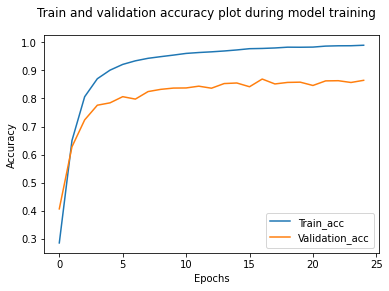

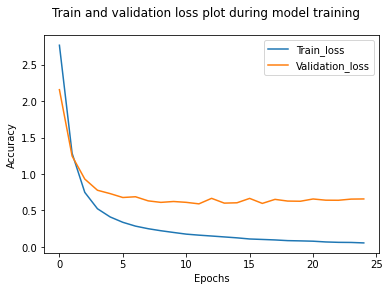

In [18]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
epochs = range(len(accuracy))
fig1 = plt.figure(0)
fig1.suptitle('Train and validation accuracy plot during model training')
plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train_acc', 'Validation_acc'])
loss = history.history['loss']
val_loss = history.history['val_loss']
fig2 = plt.figure(1)
fig2.suptitle('Train and validation loss plot during model training')
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train_loss', 'Validation_loss'])

# CONFUSION MATRIX

Visualizing the result of the model and aanalyzing or testing the result using Confusion Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


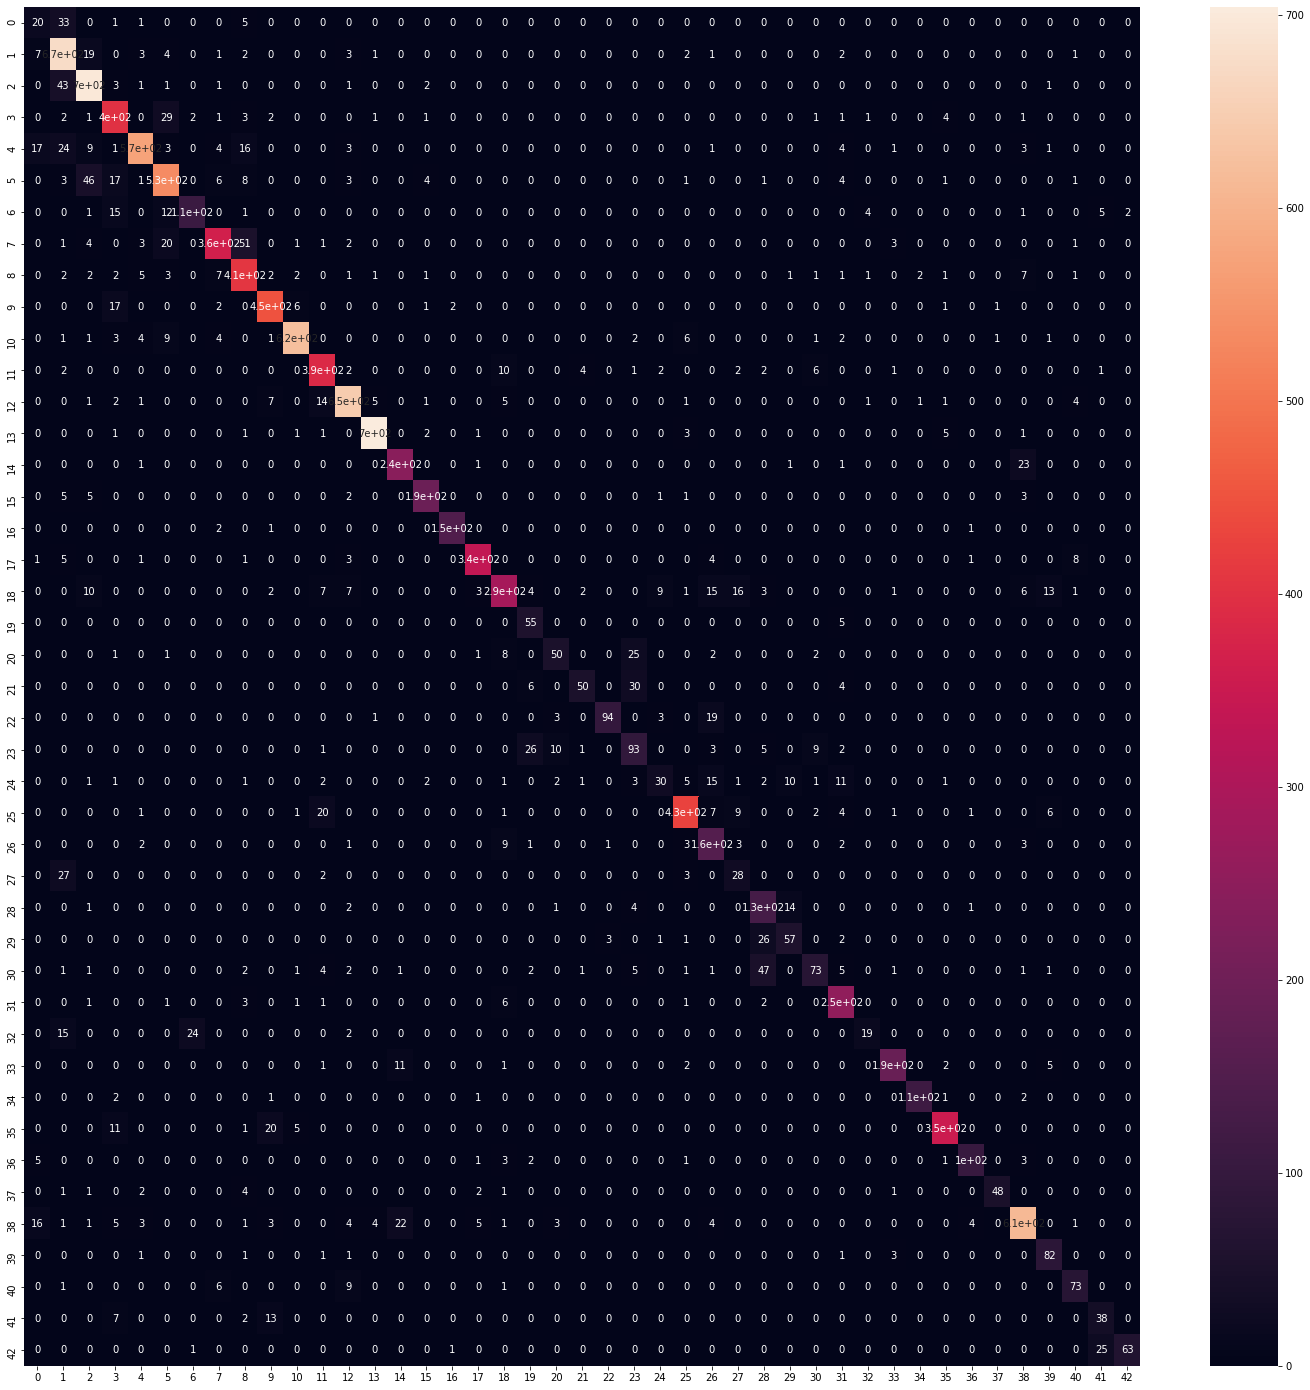

In [19]:
predicted_classes = CNN.predict_classes(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

Comparing precicted result with test output



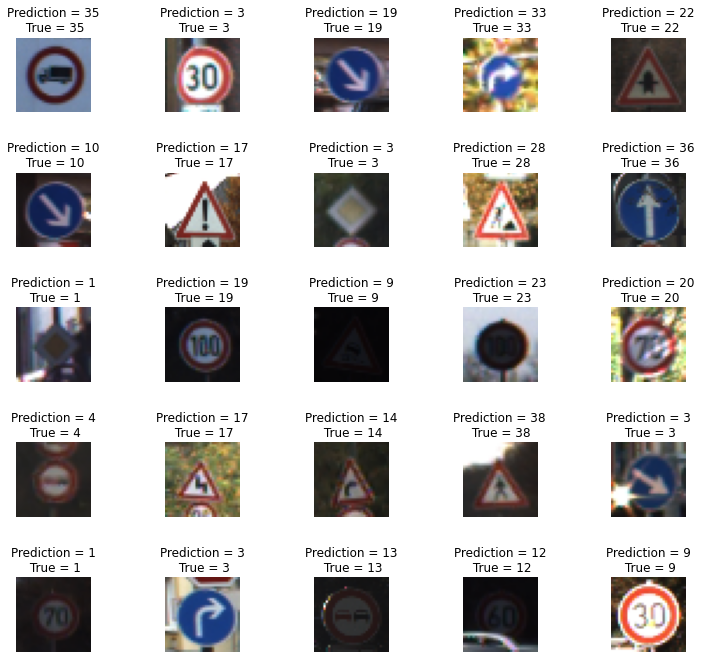

In [20]:
# Comparing precicted result with test output
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    
print('Comparing precicted result with test output\n')

# APPENDIX


- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }